# COGS 108 - EDA Checkpoint

# Names

- Kenneth Lam
- Bateliel Bassa
- Zhi Liang

<a id='research_question'></a>
# Research Question

We want to see if there is a correlation between changes in happiness measured and suicide rates in different countries, and if there is a correlation, what are the leading factors in happiness in the country, such as wealth, that correlate with suicide rates. We can do this by looking at the different factors of happiness in different countries and comparing their suicide rates, and then looking at various relationships between the factors for happiness and the Life Ladder statistic that is the main measure for happiness, as well as suicide rates.

An example research question would be: "Is there any correlation between countries' metrics in the World Happiness Report, as established by the similarly named organization, and suicide statistics provided by the World Health Organization during the time period of 2005 to 2017?"

A follow-up to this question, if this correlation existed would be: "What are the relationships between countries' Life Ladder statistic that is used as a major measure of countries' happiness and the factors that may lead to this statistic, such as wealth and social support, and the effect of these factors on suicide rates in countries during the time period of 2005 to 2017?"

# Setup

In [1]:
## YOUR CODE HERE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

who_suicide = pd.read_csv("who_suicide_statistics.csv")
world_happiness = pd.read_csv("world-happiness-report.csv")

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
who_suicide = who_suicide.dropna().reset_index(drop = True)
display(who_suicide)
world_happiness

# This is just our data cleaning from last checkpoint. Nothing else was needed.

,country,year,sex,age,suicides_no,population
0,Albania,1987,female,15-24 years,14.0,289700.0
1,Albania,1987,female,25-34 years,4.0,257200.0
2,Albania,1987,female,35-54 years,6.0,278800.0
3,Albania,1987,female,5-14 years,0.0,311000.0
4,Albania,1987,female,55-74 years,0.0,144600.0
...,...,...,...,...,...,...
36055,Virgin Islands (USA),2015,male,25-34 years,2.0,4609.0
36056,Virgin Islands (USA),2015,male,35-54 years,1.0,12516.0
36057,Virgin Islands (USA),2015,male,5-14 years,0.0,7291.0
36058,Virgin Islands (USA),2015,male,55-74 years,0.0,12615.0


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

In [3]:
# Describing dataset first
who_suicide.describe()

,year,suicides_no,population
count,36060.000000,36060.000000,3.606000e+04
mean,1998.935441,221.809956,1.699996e+06
std,10.163883,855.449442,3.697811e+06
min,1979.000000,0.000000,2.590000e+02
25%,1991.000000,2.000000,8.056600e+04
50%,2000.000000,21.000000,3.757650e+05
75%,2008.000000,116.000000,1.344900e+06
max,2016.000000,22338.000000,4.380521e+07


In [4]:
world_happiness.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


Our goal in this project is to look at the relationship between world happiness and suicide rates.
For this goal, we should first understand how many countries we are dealing with, and what time periods we are working in.

In [5]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
who_suicide['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei Darussalam',
       'Bulgaria', 'Cabo Verde', 'Canada', 'Cayman Islands', 'Chile',
       'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominica', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France',
       'French Guiana', 'Georgia', 'Germany', 'Greece', 'Grenada',
       'Guadeloupe', 'Guatemala', 'Guyana', 'Hong Kong SAR', 'Hungary',
       'Iceland', 'Iran (Islamic Rep of)', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Macau',
       'Maldives', 'Malta', 'Martinique', 'Mauritius', 'Mayotte',
       'Mexico', 'Mongolia', 'Montenegro', 'Netherlands', 'New 

In [6]:
world_happiness['Country name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jord

We only want the countries that are in both world_happiness and who_suicide, so let's filter countries that don't fit this criteria.

In [7]:
who_unique = who_suicide['country'].unique()
happy_unique = world_happiness['Country name'].unique()

# First, we get common countries.

common = set(who_unique).intersection(happy_unique)
common_list = list(common)
print('Common_countries:', common_list)

# Then, we filter out entries not in the list of countries.

who_country_filter = who_suicide.loc[who_suicide['country'].isin(common_list)]
display(who_country_filter)

happy_country_filter = world_happiness.loc[world_happiness['Country name'].isin(common_list)]
happy_country_filter

Common_countries: ['Belgium', 'Uzbekistan', 'Panama', 'United Arab Emirates', 'Egypt', 'United Kingdom', 'Switzerland', 'Thailand', 'Guatemala', 'Brazil', 'Albania', 'Turkey', 'Norway', 'Bosnia and Herzegovina', 'Mongolia', 'Chile', 'Uruguay', 'Kuwait', 'Slovenia', 'Kazakhstan', 'Croatia', 'Austria', 'Turkmenistan', 'Kyrgyzstan', 'Mexico', 'Guyana', 'Ecuador', 'Georgia', 'Denmark', 'Hungary', 'Luxembourg', 'Singapore', 'Argentina', 'Japan', 'Mauritius', 'Jamaica', 'Nicaragua', 'El Salvador', 'Lithuania', 'Iceland', 'Sweden', 'Costa Rica', 'Philippines', 'Armenia', 'Romania', 'Portugal', 'Ireland', 'Malta', 'Oman', 'Cyprus', 'South Africa', 'Canada', 'Sri Lanka', 'Australia', 'Israel', 'Paraguay', 'Germany', 'Serbia', 'Suriname', 'Spain', 'Montenegro', 'Cuba', 'New Zealand', 'Italy', 'Bulgaria', 'Qatar', 'Azerbaijan', 'Greece', 'Bahrain', 'Netherlands', 'Finland', 'France', 'Maldives', 'Ukraine', 'Belarus', 'Trinidad and Tobago', 'Czech Republic', 'Poland', 'Estonia', 'Slovakia', 'Colom

,country,year,sex,age,suicides_no,population
0,Albania,1987,female,15-24 years,14.0,289700.0
1,Albania,1987,female,25-34 years,4.0,257200.0
2,Albania,1987,female,35-54 years,6.0,278800.0
3,Albania,1987,female,5-14 years,0.0,311000.0
4,Albania,1987,female,55-74 years,0.0,144600.0
...,...,...,...,...,...,...
35455,Uzbekistan,2014,male,25-34 years,318.0,2739150.0
35456,Uzbekistan,2014,male,35-54 years,519.0,3421300.0
35457,Uzbekistan,2014,male,5-14 years,60.0,2762158.0
35458,Uzbekistan,2014,male,55-74 years,144.0,1271111.0


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
12,Albania,2007,4.634,9.142,0.821,65.80,0.529,-0.009,0.875,0.553,0.246
13,Albania,2009,5.485,9.262,0.833,66.20,0.525,-0.158,0.864,0.640,0.279
14,Albania,2010,5.269,9.303,0.733,66.40,0.569,-0.172,0.726,0.648,0.300
15,Albania,2011,5.867,9.331,0.759,66.68,0.487,-0.205,0.877,0.628,0.257
16,Albania,2012,5.510,9.347,0.785,66.96,0.602,-0.169,0.848,0.607,0.271
...,...,...,...,...,...,...,...,...,...,...,...
1874,Uzbekistan,2015,5.972,8.714,0.968,64.20,0.980,0.375,0.471,0.840,0.103
1875,Uzbekistan,2016,5.893,8.756,0.945,64.50,0.984,0.208,NaN,0.842,0.147
1876,Uzbekistan,2017,6.421,8.782,0.942,64.80,0.985,0.123,0.465,0.839,0.203
1877,Uzbekistan,2018,6.205,8.818,0.921,65.10,0.970,0.318,0.520,0.825,0.209


 Similarly, we want our data to be taken during the same time as well. Once again, we will filter out any entries with different time periods than what is shared between them.

In [8]:
who_year_unique = who_suicide['year'].unique()
happy_year_unique = world_happiness['year'].unique()


common_year = set(who_year_unique).intersection(happy_year_unique)
common_year_list = list(common_year)
common_year_list = sorted(common_year_list)
print('Common Years:' , common_year_list)

who_year_filter = who_country_filter.loc[who_country_filter['year'].isin(common_year_list)]
display(who_year_filter)

happy_year_filter = happy_country_filter.loc[happy_country_filter['year'].isin(common_year_list)]
happy_year_filter

Common Years: [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


,country,year,sex,age,suicides_no,population
192,Albania,2005,female,15-24 years,0.0,281922.0
193,Albania,2005,female,25-34 years,0.0,190745.0
194,Albania,2005,female,35-54 years,0.0,386513.0
195,Albania,2005,female,5-14 years,0.0,276559.0
196,Albania,2005,female,55-74 years,0.0,210998.0
...,...,...,...,...,...,...
35455,Uzbekistan,2014,male,25-34 years,318.0,2739150.0
35456,Uzbekistan,2014,male,35-54 years,519.0,3421300.0
35457,Uzbekistan,2014,male,5-14 years,60.0,2762158.0
35458,Uzbekistan,2014,male,55-74 years,144.0,1271111.0


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
12,Albania,2007,4.634,9.142,0.821,65.80,0.529,-0.009,0.875,0.553,0.246
13,Albania,2009,5.485,9.262,0.833,66.20,0.525,-0.158,0.864,0.640,0.279
14,Albania,2010,5.269,9.303,0.733,66.40,0.569,-0.172,0.726,0.648,0.300
15,Albania,2011,5.867,9.331,0.759,66.68,0.487,-0.205,0.877,0.628,0.257
16,Albania,2012,5.510,9.347,0.785,66.96,0.602,-0.169,0.848,0.607,0.271
...,...,...,...,...,...,...,...,...,...,...,...
1871,Uzbekistan,2012,6.019,8.550,0.933,63.60,0.914,-0.037,0.463,0.786,0.118
1872,Uzbekistan,2013,5.940,8.607,0.963,63.80,0.950,-0.034,0.434,0.749,0.130
1873,Uzbekistan,2014,6.049,8.659,0.952,64.00,0.954,0.061,0.536,0.805,0.106
1874,Uzbekistan,2015,5.972,8.714,0.968,64.20,0.980,0.375,0.471,0.840,0.103


From this, we can see that the intersecting time periods for this data is from
2005 to 2016. 

In [9]:
who_suicide = who_year_filter.dropna().reset_index(drop = True)
display(who_suicide)

world_happiness = happy_year_filter.dropna().reset_index(drop = True)
world_happiness

,country,year,sex,age,suicides_no,population
0,Albania,2005,female,15-24 years,0.0,281922.0
1,Albania,2005,female,25-34 years,0.0,190745.0
2,Albania,2005,female,35-54 years,0.0,386513.0
3,Albania,2005,female,5-14 years,0.0,276559.0
4,Albania,2005,female,55-74 years,0.0,210998.0
...,...,...,...,...,...,...
9607,Uzbekistan,2014,male,25-34 years,318.0,2739150.0
9608,Uzbekistan,2014,male,35-54 years,519.0,3421300.0
9609,Uzbekistan,2014,male,5-14 years,60.0,2762158.0
9610,Uzbekistan,2014,male,55-74 years,144.0,1271111.0


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Albania,2007,4.634,9.142,0.821,65.80,0.529,-0.009,0.875,0.553,0.246
1,Albania,2009,5.485,9.262,0.833,66.20,0.525,-0.158,0.864,0.640,0.279
2,Albania,2010,5.269,9.303,0.733,66.40,0.569,-0.172,0.726,0.648,0.300
3,Albania,2011,5.867,9.331,0.759,66.68,0.487,-0.205,0.877,0.628,0.257
4,Albania,2012,5.510,9.347,0.785,66.96,0.602,-0.169,0.848,0.607,0.271
...,...,...,...,...,...,...,...,...,...,...,...
673,Uzbekistan,2011,5.739,8.493,0.924,63.40,0.934,0.042,0.522,0.787,0.123
674,Uzbekistan,2012,6.019,8.550,0.933,63.60,0.914,-0.037,0.463,0.786,0.118
675,Uzbekistan,2013,5.940,8.607,0.963,63.80,0.950,-0.034,0.434,0.749,0.130
676,Uzbekistan,2014,6.049,8.659,0.952,64.00,0.954,0.061,0.536,0.805,0.106


 (Delete at submission) link for world happiness variables since they were a bit confusing for me to fully understand https://happiness-report.s3.amazonaws.com/2021/Appendix1WHR2021C2.pdf

<AxesSubplot:xlabel='year', ylabel='Life Ladder'>

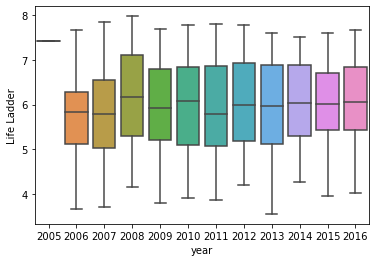

In [10]:
sns.boxplot(data = world_happiness, x = 'year', y = 'Life Ladder')

In [11]:
'''
Here, we remove the sex and age from our who_suicide dataframe since we will not use 
that in our calculations and we get the total number of suicides for that year and the total population instead.
'''
suicide_total = who_suicide.groupby(["country", "year"]).agg({'suicides_no':'sum', 'population': 'sum'}).reset_index()

'''
We then add a column with the ratio of suicides to population for each country for each year so we can compare each 
country
'''
suicide_total["ratio"] = suicide_total["suicides_no"]/suicide_total["population"]
suicide_total

,country,year,suicides_no,population,ratio
0,Albania,2005,0.0,2783320.0,0.000000
1,Albania,2006,0.0,2780176.0,0.000000
2,Albania,2007,124.0,2770344.0,0.000045
3,Albania,2008,160.0,2757059.0,0.000058
4,Albania,2009,0.0,2745735.0,0.000000
...,...,...,...,...,...
796,Uzbekistan,2010,1464.0,25651783.0,0.000057
797,Uzbekistan,2011,1640.0,25978049.0,0.000063
798,Uzbekistan,2012,1835.0,26381830.0,0.000070
799,Uzbekistan,2013,1950.0,26838924.0,0.000073


In [12]:
world_happiness = world_happiness.rename(columns = {"Country name": "country"})

'''
We only want the information from the world happiness report that has the country and year overlap so we 
merge the two dataframes together if they have same country and year.
'''

final = pd.merge(suicide_total, world_happiness, how = "inner", on = ["country", "year"])
final

,country,year,suicides_no,population,ratio,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Albania,2007,124.0,2770344.0,0.000045,4.634,9.142,0.821,65.80,0.529,-0.009,0.875,0.553,0.246
1,Albania,2009,0.0,2745735.0,0.000000,5.485,9.262,0.833,66.20,0.525,-0.158,0.864,0.640,0.279
2,Albania,2010,96.0,2736025.0,0.000035,5.269,9.303,0.733,66.40,0.569,-0.172,0.726,0.648,0.300
3,Argentina,2006,3108.0,35918886.0,0.000087,6.313,9.942,0.938,66.82,0.733,-0.157,0.852,0.825,0.328
4,Argentina,2007,2946.0,36315492.0,0.000081,6.073,10.018,0.862,66.94,0.653,-0.141,0.881,0.828,0.279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,Uruguay,2015,630.0,3190795.0,0.000197,6.628,9.932,0.891,68.70,0.917,-0.032,0.673,0.893,0.300
542,Uzbekistan,2011,1640.0,25978049.0,0.000063,5.739,8.493,0.924,63.40,0.934,0.042,0.522,0.787,0.123
543,Uzbekistan,2012,1835.0,26381830.0,0.000070,6.019,8.550,0.933,63.60,0.914,-0.037,0.463,0.786,0.118
544,Uzbekistan,2013,1950.0,26838924.0,0.000073,5.940,8.607,0.963,63.80,0.950,-0.034,0.434,0.749,0.130


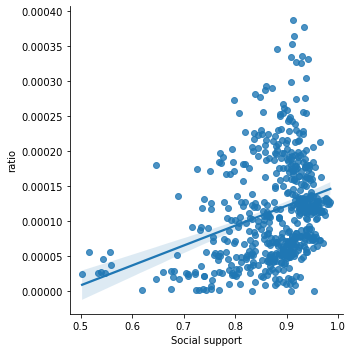

In [13]:
'''
Here we can see the number of suicides correlates positively to social support.
There are not really any outliers.
'''
social_support_graph = sns.lmplot(data = final, x = "Social support", y = "ratio")

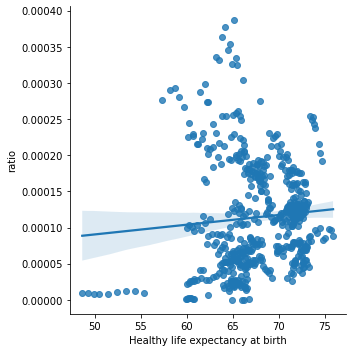

In [14]:
'''
Here we can see the number of suicides correlates positively to healthy life expectancy, although
it is not as steep as social support. 
There is a line of outliers on the bottom left.
'''
healthy_graph = sns.lmplot(data = final, x = "Healthy life expectancy at birth", y = "ratio")

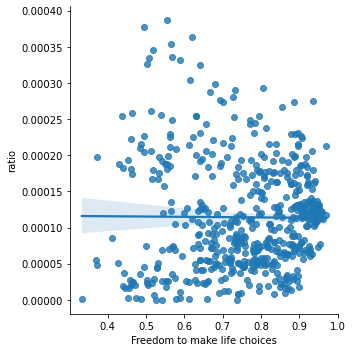

In [15]:
'''
Here we can see the number of suicides correlates negatively to freedom to make life choices.
There are a few outliers spread out all throughout the plot.
'''
freedom_graph = sns.lmplot(data = final, x = "Freedom to make life choices", y = "ratio")

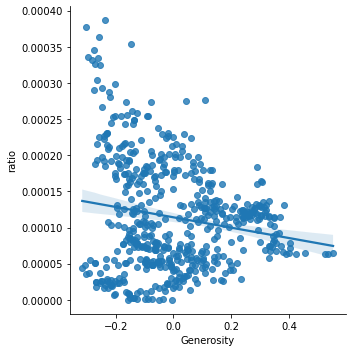

In [16]:
'''
Here we can see the number of suicides correlates negatively to generosity.
There are a few outliers at the -0.2 generosity mark but most of the data is concentrated.
'''
generosity_graph = sns.lmplot(data = final, x = "Generosity", y = "ratio")

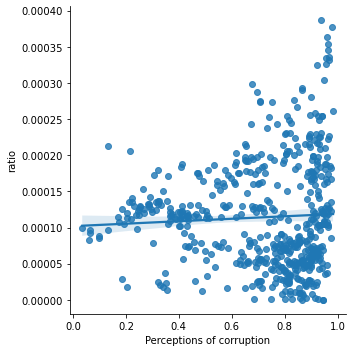

In [17]:
'''
Here we can see the number of suicides correlates positively to generosity.
There are a few outliers most most of the data is concentrated on the right.
'''
corruption_graph = sns.lmplot(data = final, x = "Perceptions of corruption", y = "ratio")